FLIGHT PRICE PREDICTION

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on -

 1. Time of purchase patterns (making sure last-minute purchases are expensive) 
 2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and     hold back inventory for those expensive last-minute expensive purchases) 

So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights. STEPS 1. Data Collection
You have to scrape at least 1500 rows of data. You can scrape more data as well, it’s up to you, More the data better the model

In this section you have to scrape the data of flights from different websites (yatra.com, skyscanner.com, official websites of airlines, etc). The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are airline name, date of journey, source, destination, route, departure time, arrival time, duration, total stops and the target variable price. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data.

Data Analysis

After cleaning the data, you have to do some analysis on the data. Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend to go up or down over time? What is the best time to buy so that the consumer can save the most by taking the least risk? Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are morning flights expensive?

Model Building

After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.
Follow the complete life cycle of data science. Include all the steps like

 1. Data Cleaning
 2. Exploratory Data Analysis
 3. Data Pre-processing
 4. Model Building
 5. Model Evaluation
 6. Selecting the best model

In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
from scipy.stats import zscore   
from sklearn.preprocessing import PowerTransformer  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [164]:
# Reading excel file
df = pd.read_excel(r"C:\Users\sanka\OneDrive\Desktop\flight\scrapped_flight_details.xlsx")
df.head()

,Unnamed: 0,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price
0,0,Go First,08:45,10:55,2h 10m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
1,1,Go First,14:20,16:35,2h 15m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
2,2,Go First,21:00,23:15,2h 15m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
3,3,Go First,16:20,21:55,5h 35m,New Delhi,Mumbai,eCash 250,1 Stop,"5,954"
4,4,Go First,13:45,19:40,5h 55m,New Delhi,Mumbai,eCash 250,1 Stop,"5,954"


In [165]:
df.tail()

,Unnamed: 0,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price
3622,3622,Air India,20:15,19:10,22h 55m,Lucknow,Jaipur,Free Meal,1 Stop,"7,359"
3623,3623,IndiGo,13:00,22:50,9h 50m,Lucknow,Jaipur,eCash 250,1 Stop,"8,912"
3624,3624,Air India,11:05,13:15,26h 10m,Lucknow,Jaipur,Free Meal,1 Stop,"12,189"
3625,3625,Air India,20:15,13:15,17h 00m,Lucknow,Jaipur,Free Meal,2 Stop(s),"13,977"
3626,3626,Air India,17:05,13:15,20h 10m,Lucknow,Jaipur,Free Meal,3 Stop(s),"14,604"


Here I am importing the colleced dataset which is in excel format and storing it into dataframe (df) for further usage. Here we can observe first 5 and last 5 rows of the dataset. There are 3627 rows and 10 columns in the dataframe. The dataset contains both numerical and categorical data. There are both dependent and independent variables present in the dataframe. We have our target variable "Price" which stores the price of the flight tickets and it is continuous in nature which makes this problem to be a Regression Problem.

In [166]:
# Dropping unwanted column
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head() 


,Airline,Departure_time,Time_of_arrival,Duration,Source,Destination,Meal_availability,Number_of_stops,Price
0,Go First,08:45,10:55,2h 10m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
1,Go First,14:20,16:35,2h 15m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
2,Go First,21:00,23:15,2h 15m,New Delhi,Mumbai,eCash 250,Non Stop,"5,954"
3,Go First,16:20,21:55,5h 35m,New Delhi,Mumbai,eCash 250,1 Stop,"5,954"
4,Go First,13:45,19:40,5h 55m,New Delhi,Mumbai,eCash 250,1 Stop,"5,954"


In [167]:
#checking shape of the dataset
df.shape

(3627, 9)

In [168]:
#checking column names of the dataset
df.columns

Index(['Airline', 'Departure_time', 'Time_of_arrival', 'Duration', 'Source',
       'Destination', 'Meal_availability', 'Number_of_stops', 'Price'],
      dtype='object')

In [169]:
# Checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
Airline,7
Departure_time,206
Time_of_arrival,225
Duration,414
Source,9
Destination,9
Meal_availability,7
Number_of_stops,5
Price,1015


In [170]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627 entries, 0 to 3626
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            3627 non-null   object
 1   Departure_time     3627 non-null   object
 2   Time_of_arrival    3627 non-null   object
 3   Duration           3627 non-null   object
 4   Source             3627 non-null   object
 5   Destination        3627 non-null   object
 6   Meal_availability  3627 non-null   object
 7   Number_of_stops    3627 non-null   object
 8   Price              3627 non-null   object
dtypes: object(9)
memory usage: 255.1+ KB


The dataset contains object type data. We will encode the object datatypes using appropriate encoding techniques before building machine learning models.

Since counts of all the columns are same, which means there are no null values present in the dataset.

In [171]:
# Checking null values in the dataset
df.isnull().sum()

Airline              0
Departure_time       0
Time_of_arrival      0
Duration             0
Source               0
Destination          0
Meal_availability    0
Number_of_stops      0
Price                0
dtype: int64

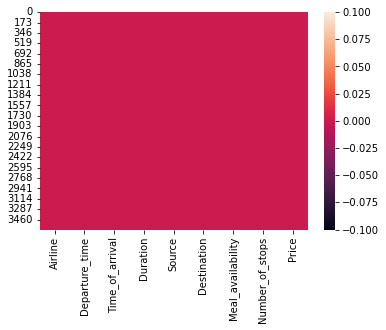

In [172]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())
plt.show()

In [173]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('-'*120)

Air India    1525
Vistara       993
IndiGo        752
Go First      169
SpiceJet      145
Air Asia       39
StarAir         4
Name: Airline, dtype: int64
------------------------------------------------------------------------------------------------------------------------
14:00    97
06:30    85
06:10    72
20:15    71
13:20    70
         ..
15:00     1
06:25     1
16:40     1
22:00     1
05:00     1
Name: Departure_time, Length: 206, dtype: int64
------------------------------------------------------------------------------------------------------------------------
19:40    85
21:35    81
23:35    71
16:55    70
19:55    68
         ..
19:30     1
08:30     1
04:45     1
07:15     1
11:05     1
Name: Time_of_arrival, Length: 225, dtype: int64
------------------------------------------------------------------------------------------------------------------------
2h 45m     35
2h 15m     35
2h 10m     29
25h 30m    29
1h 10m     23
           ..
38h 40m     1
36h 05m     1
34h 05m   

The columns Time_of_arrival and Departure_Time showing object data type which means python is not able to understand the type of data in this column due to some string values or categorical signs like ":" which we can observe in the value count function. Therefore, we have to convert this datatype into timestamp (datetime) to use them properly for prediction.



In [174]:
# Converting columns from object type to Datetime Type
df["Departure_time"] = pd.to_datetime(df["Departure_time"])
df["Time_of_arrival"] = pd.to_datetime(df["Time_of_arrival"])

In [175]:
#Checking the data types of all columns again
df.dtypes

Airline                      object
Departure_time       datetime64[ns]
Time_of_arrival      datetime64[ns]
Duration                     object
Source                       object
Destination                  object
Meal_availability            object
Number_of_stops              object
Price                        object
dtype: object

The column Duration has values in terms of minutes and hours. Duration means the time taken by the plane to reach the destination and it is the difference between the arrival time and Departure time. Let's extract proper duration time in terms of float data type from Time_of_arrival and Departure_time columns.

In [176]:
#Extracting Duration column using Time_of_arrival and Departure_Time
Difference = (df["Time_of_arrival"]-df["Departure_time"])
Diff_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600  # Converting difference into seconds and Dividing it by 3600 (1hr=3600seconds)
    Diff_list.append(duration)
df["Duration"] = Diff_list

Let's extract values from Departure_time. Departure time means when a flight leaves the airport and this column contains hours and minutes so we will extract hours and minutes from Departure_time.

In [177]:
# Departure time means the time when the journey starts from the source.

# Extracting Hours from Departure_time column
df["Departure_Hour"] = pd.to_datetime(df["Departure_time"]).dt.hour

# Extracting Minutes from Dep_Time column
df["Departure_Min"] = pd.to_datetime(df["Departure_time"]).dt.minute

In [178]:
# Dropping Departure_time column
df.drop("Departure_time",axis=1,inplace=True)

Similarly we can extract hours and minutes from Time_of_arrival column and dropping Time_of_arrival column.

In [179]:
# Arrival time is time of arrival at the destination.

# Extracting hour from Time_of_arrival column
df["Arrival_Hour"] = pd.to_datetime(df["Time_of_arrival"]).dt.hour

# Extracting Minutes from Arrival_Time column
df["Arrival_Min"] = pd.to_datetime(df["Time_of_arrival"]).dt.minute

# Dropping Arrival_Time column
df.drop("Time_of_arrival",axis=1,inplace=True)

The target column should be in continuous numeric data type but it is appearing as object data type due to some categorical sign ",". Let's replace this sign by empty space and convert the type into float.

In [180]:
# Let's replace "," sign by empty space
df['Price'] = df['Price'].str.replace(',','')
# Let's convert data type of Price column to float
df['Price'] = df['Price'].astype('float')

From the value count function of Meal_availability we can observe "eCash 250" entry which does not belongs to meals so we can replace it as "None". Also, the other two entries "No meal fare" and "Free meal" belongs to same category that is they give same meaning so we can group them as well. We can also drop this column, but there are only few features in the dataset so, trying to retain the columns for prediction.

In [181]:
# Replacing "eCash250" by "None"
df['Meal_availability'] = df['Meal_availability'].replace('eCash 250','None')
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 109 Kg CO2','None')
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 185 Kg CO2','None')
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 105 Kg CO2','None')
df['Meal_availability'] = df['Meal_availability'].replace('Emissions: 142 Kg CO2','None')

# Grouping the entries with same meaning
df['Meal_availability'] = df['Meal_availability'].replace('No Meal Fare','Free Meal')

From the value count function of Number_of_stops we can observe the categorical values, let's replace them with numeric data.

In [182]:
# Replacing categorical values with numeric data
df.Number_of_stops.replace({"Non Stop": 0,"1 Stop": 1,"2 Stop(s)": 2,"3 Stop(s)": 3,"4 Stop(s)": 4},inplace = True)

Now we have successfully cleaned our data, let's have a look at dataframe.

In [183]:
# Checking dataset again
df

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,Go First,2.166667,New Delhi,Mumbai,None,0,5954.0,8,45,10,55
1,Go First,2.250000,New Delhi,Mumbai,None,0,5954.0,14,20,16,35
2,Go First,2.250000,New Delhi,Mumbai,None,0,5954.0,21,0,23,15
3,Go First,5.583333,New Delhi,Mumbai,None,1,5954.0,16,20,21,55
4,Go First,5.916667,New Delhi,Mumbai,None,1,5954.0,13,45,19,40
...,...,...,...,...,...,...,...,...,...,...,...
3622,Air India,22.916667,Lucknow,Jaipur,Free Meal,1,7359.0,20,15,19,10
3623,IndiGo,9.833333,Lucknow,Jaipur,None,1,8912.0,13,0,22,50
3624,Air India,2.166667,Lucknow,Jaipur,Free Meal,1,12189.0,11,5,13,15
3625,Air India,17.000000,Lucknow,Jaipur,Free Meal,2,13977.0,20,15,13,15


In [184]:
# Checking shape of data after cleaning 
df.shape

(3627, 11)

In [185]:
# Let's check the data types of the columns
df.dtypes

Airline               object
Duration             float64
Source                object
Destination           object
Meal_availability     object
Number_of_stops        int64
Price                float64
Departure_Hour         int64
Departure_Min          int64
Arrival_Hour           int64
Arrival_Min            int64
dtype: object

In [186]:
# Checking the uniqueness of target column
df["Price"].unique()

array([ 5954.,  5955.,  6060., ...,  8912., 12189., 14604.])

In [187]:
# Checking whether the target contains any space
df.loc[df['Price']==" "]

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min


In [188]:
# Statistical summary of dataset
df.describe()

,Duration,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
count,3627.000000,3627.000000,3627.000000,3627.000000,3627.000000,3627.000000,3627.000000
mean,10.087837,1.335815,11096.770885,13.105597,23.424318,15.346567,29.323132
std,7.008560,0.759746,4021.300882,5.113887,17.087426,5.285176,18.042003
min,0.000000,0.000000,3361.000000,0.000000,0.000000,0.000000,0.000000
25%,3.708333,1.000000,7952.500000,9.000000,10.000000,11.000000,15.000000
50%,8.916667,1.000000,10954.000000,13.000000,20.000000,16.000000,30.000000
75%,15.916667,2.000000,13276.000000,17.000000,35.000000,20.000000,45.000000
max,23.916667,4.000000,34441.000000,23.000000,55.000000,23.000000,55.000000


From the above statistical summary of the dataset we can observe the following things

The counts of every column is same which means there are no missing values present in the dataset.

The mean value is greater than the median(50%) in the columns Duration, Number_of_stops, and Price so we can say these columns are skewed to right.

The median(50%) is bit greater than mean in Departure_Hour, Departure_Min, Arrival_Hour, Arrival_Hour and Arrival_Min which means these columns are skewed to left.

From the description we can say the minimum price of the flight ticket is Rs.3362.00 and maximum price is Rs.30954.00 also the mean is 10744.987366.

In summarizing the data we can observe that there is huge difference in maximum and 75% percentile in the columns Price, Duration, etc that means huge outliers present in those columns. These differences can also be seen in many other columns.

So we need to remove outliers and skewness to get better model and prediction.

In [189]:
# Separating numerical and categorcal columns in the dataset

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns present in the dataset are:\n",categorical_col)

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("\nNumerical columns present in the dataset are:\n",numerical_col)

Categorical columns present in the dataset are:
 ['Airline', 'Source', 'Destination', 'Meal_availability']

Numerical columns present in the dataset are:
 ['Duration', 'Number_of_stops', 'Price', 'Departure_Hour', 'Departure_Min', 'Arrival_Hour', 'Arrival_Min']


In [190]:
df.head()

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,Go First,2.166667,New Delhi,Mumbai,None,0,5954.0,8,45,10,55
1,Go First,2.250000,New Delhi,Mumbai,None,0,5954.0,14,20,16,35
2,Go First,2.250000,New Delhi,Mumbai,None,0,5954.0,21,0,23,15
3,Go First,5.583333,New Delhi,Mumbai,None,1,5954.0,16,20,21,55
4,Go First,5.916667,New Delhi,Mumbai,None,1,5954.0,13,45,19,40


# Visualizations

In [191]:
def value_counts(column):
    counts=len(df[column].value_counts())
    if counts<5:
        plt.figure(figsize=(5,5))
    elif counts<10:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
    elif counts<20:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)    
    else:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
    sns.countplot(x=column,data=df)
    plt.show()
    print("*"*200)

Air India    1525
Vistara       993
IndiGo        752
Go First      169
SpiceJet      145
Air Asia       39
StarAir         4
Name: Airline, dtype: int64


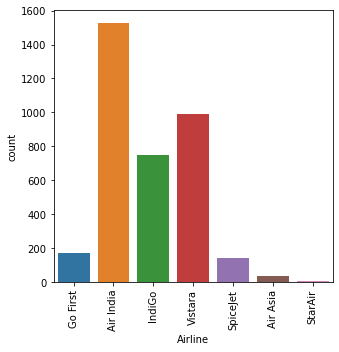

********************************************************************************************************************************************************************************************************
Mumbai       545
Bangalore    534
New Delhi    510
Chennai      473
Hyderabad    417
Kolkata      350
Goa          317
Lucknow      259
Jaipur       222
Name: Source, dtype: int64


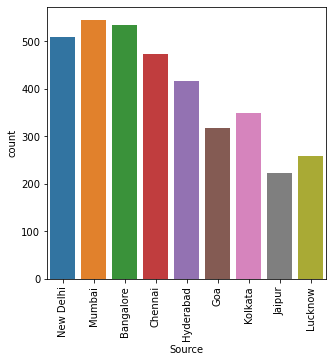

********************************************************************************************************************************************************************************************************
Bangalore    505
Mumbai       504
New Delhi    447
Chennai      428
Hyderabad    420
Lucknow      404
Goa          369
Kolkata      357
Jaipur       193
Name: Destination, dtype: int64


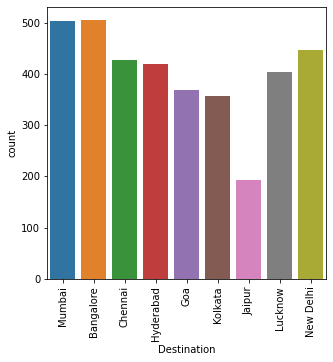

********************************************************************************************************************************************************************************************************
Free Meal    2523
None         1104
Name: Meal_availability, dtype: int64


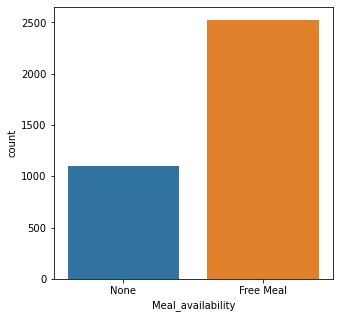

********************************************************************************************************************************************************************************************************


In [192]:
countplots=df.iloc[:,[0,2,3,4]]
for i in countplots:
    print(countplots[i].value_counts())
    value_counts(i)

Observations from the count plots

Most of the flights providing free meals and only few flights are not providing any meals.

From the count plot we can observe more number of flights are from Mumbai, New Delhi, Jaipur, Kolkata and Bangalore. Only few flights are from Hyderabad.

More number of flights are heading towards Lucknow, New Delhi and Kolkata. Only few flights are travelling to Hyderabad.

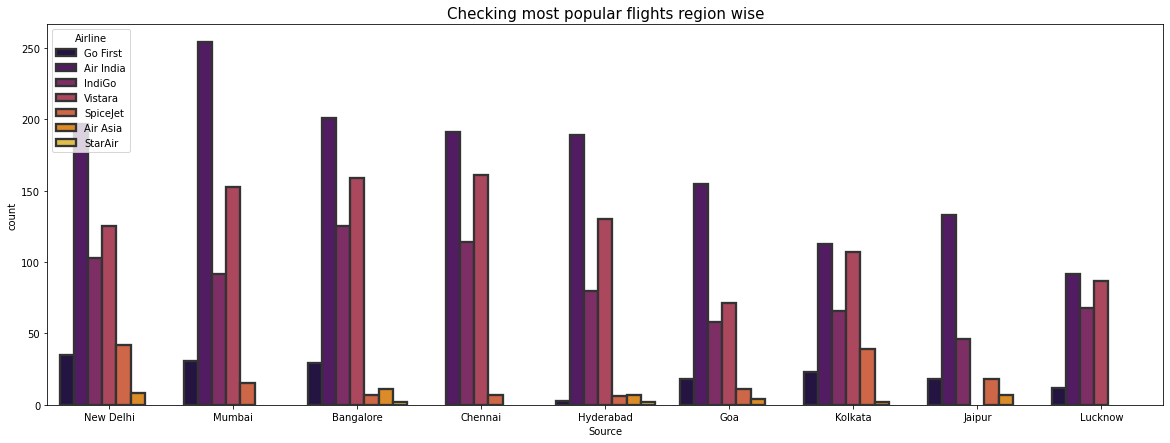

In [193]:
# Lets chcek the most popular flight region wise
plt.figure(figsize=(20,7))
sns.countplot(x = "Source", hue = "Airline", data = df, palette = "inferno",linewidth=2.3, edgecolor=".2")
plt.title("Checking most popular flights region wise",fontsize=15)
plt.show()

The plot shows the region wise count of airlines which tells us that Jaipur source is not having Vistara flights and it has Air India flights in higher count compared to other sources. Other sources have Air India, Vistara and Indigo flights with higher count.

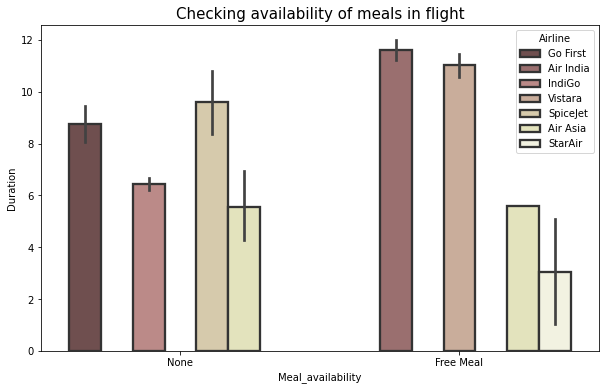

In [194]:
# Lets chcek the meals availability in flights
plt.figure(figsize=(10,6))
sns.barplot(x = "Meal_availability", y = "Duration",hue="Airline",data = df, palette = "pink",linewidth=2.3, edgecolor=".2")
plt.title("Checking availability of meals in flight",fontsize=15)
plt.show()

All the airlines provides free meals during the journey having the duration below 11 hours.

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627 entries, 0 to 3626
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            3627 non-null   object 
 1   Duration           3627 non-null   float64
 2   Source             3627 non-null   object 
 3   Destination        3627 non-null   object 
 4   Meal_availability  3627 non-null   object 
 5   Number_of_stops    3627 non-null   int64  
 6   Price              3627 non-null   float64
 7   Departure_Hour     3627 non-null   int64  
 8   Departure_Min      3627 non-null   int64  
 9   Arrival_Hour       3627 non-null   int64  
 10  Arrival_Min        3627 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 311.8+ KB


In [196]:
# Converting categorical data into numerical using Label Encoder method
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [197]:
df

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,2,2.166667,8,7,1,0,5954.0,8,45,10,55
1,2,2.250000,8,7,1,0,5954.0,14,20,16,35
2,2,2.250000,8,7,1,0,5954.0,21,0,23,15
3,2,5.583333,8,7,1,1,5954.0,16,20,21,55
4,2,5.916667,8,7,1,1,5954.0,13,45,19,40
...,...,...,...,...,...,...,...,...,...,...,...
3622,1,22.916667,6,4,0,1,7359.0,20,15,19,10
3623,3,9.833333,6,4,1,1,8912.0,13,0,22,50
3624,1,2.166667,6,4,0,1,12189.0,11,5,13,15
3625,1,17.000000,6,4,0,2,13977.0,20,15,13,15


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627 entries, 0 to 3626
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            3627 non-null   int32  
 1   Duration           3627 non-null   float64
 2   Source             3627 non-null   int32  
 3   Destination        3627 non-null   int32  
 4   Meal_availability  3627 non-null   int32  
 5   Number_of_stops    3627 non-null   int64  
 6   Price              3627 non-null   float64
 7   Departure_Hour     3627 non-null   int64  
 8   Departure_Min      3627 non-null   int64  
 9   Arrival_Hour       3627 non-null   int64  
 10  Arrival_Min        3627 non-null   int64  
dtypes: float64(2), int32(4), int64(5)
memory usage: 255.1 KB


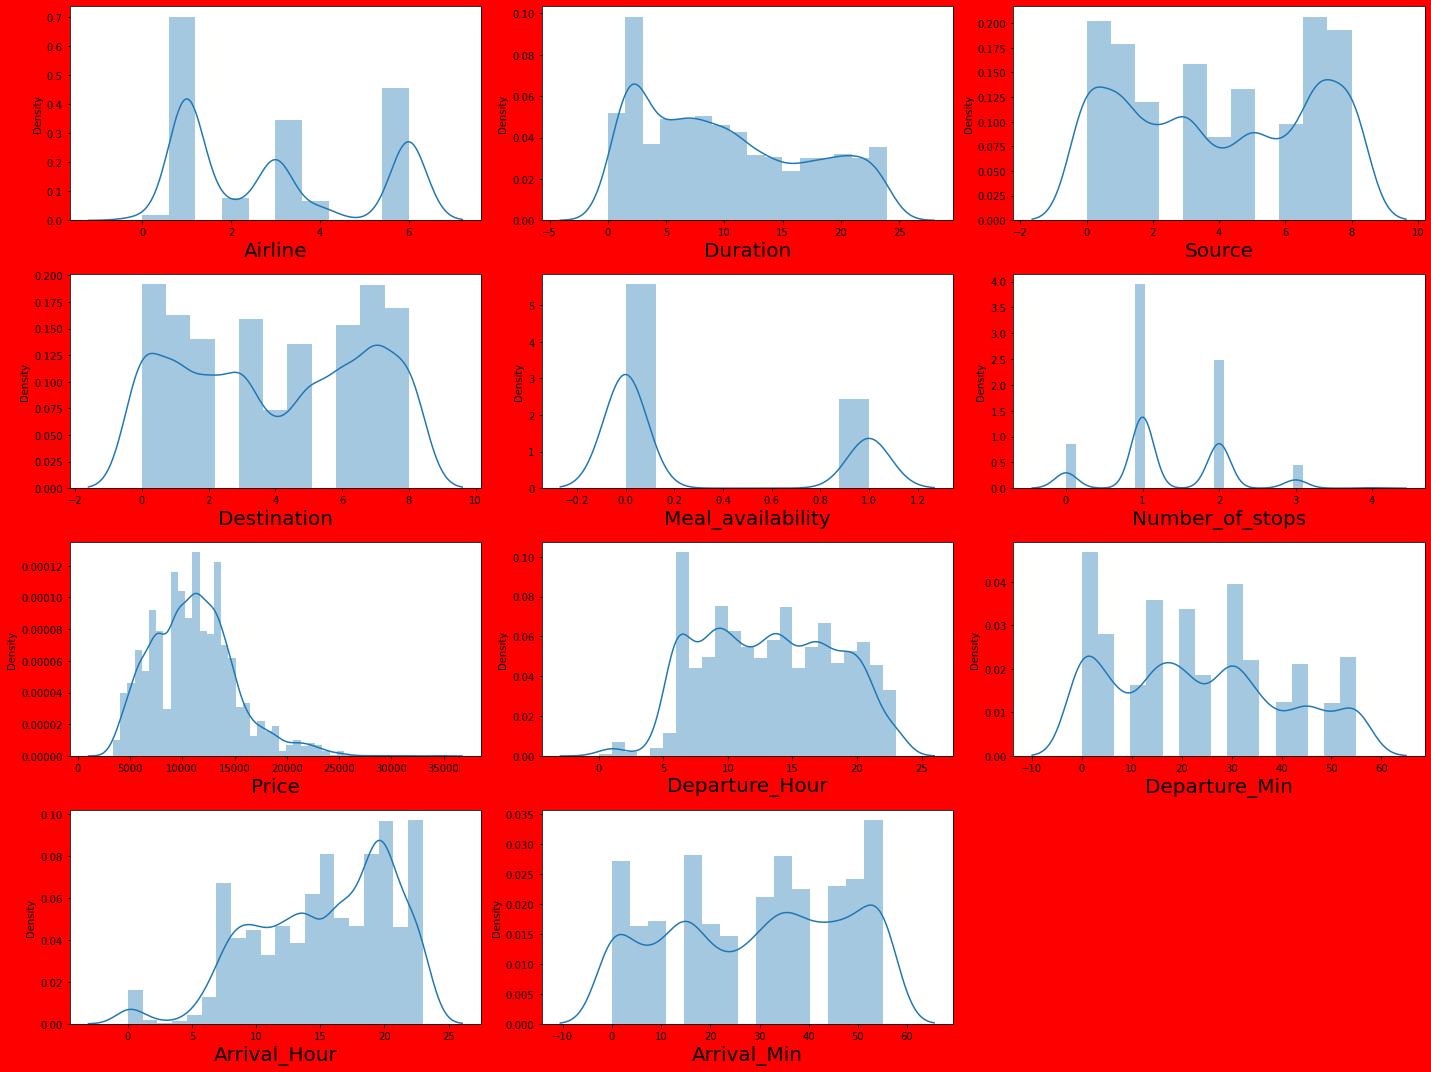

In [199]:
# now the data looks good and there is no missing values and Object values so we can start visualizing the type of distribution for each feature
# we will only evaluate the type of distribution for features having continious data here

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

Observations from the distplots

From the distribution plot we can observe the columns are somewhat distributed normally as they have no proper bell shape curve.

The columns like "Duration", "Number_of_stops" and "Price" are skewed to right as the mean value in these columns are much greater than the median(50%).

Also the data in the column Arrival_Hour skewed to left since the mean values is less than the median.

Since there is presence of skewness in the data, we need to remove skewness in the numerical columns to overcome with any kind of data biasness.

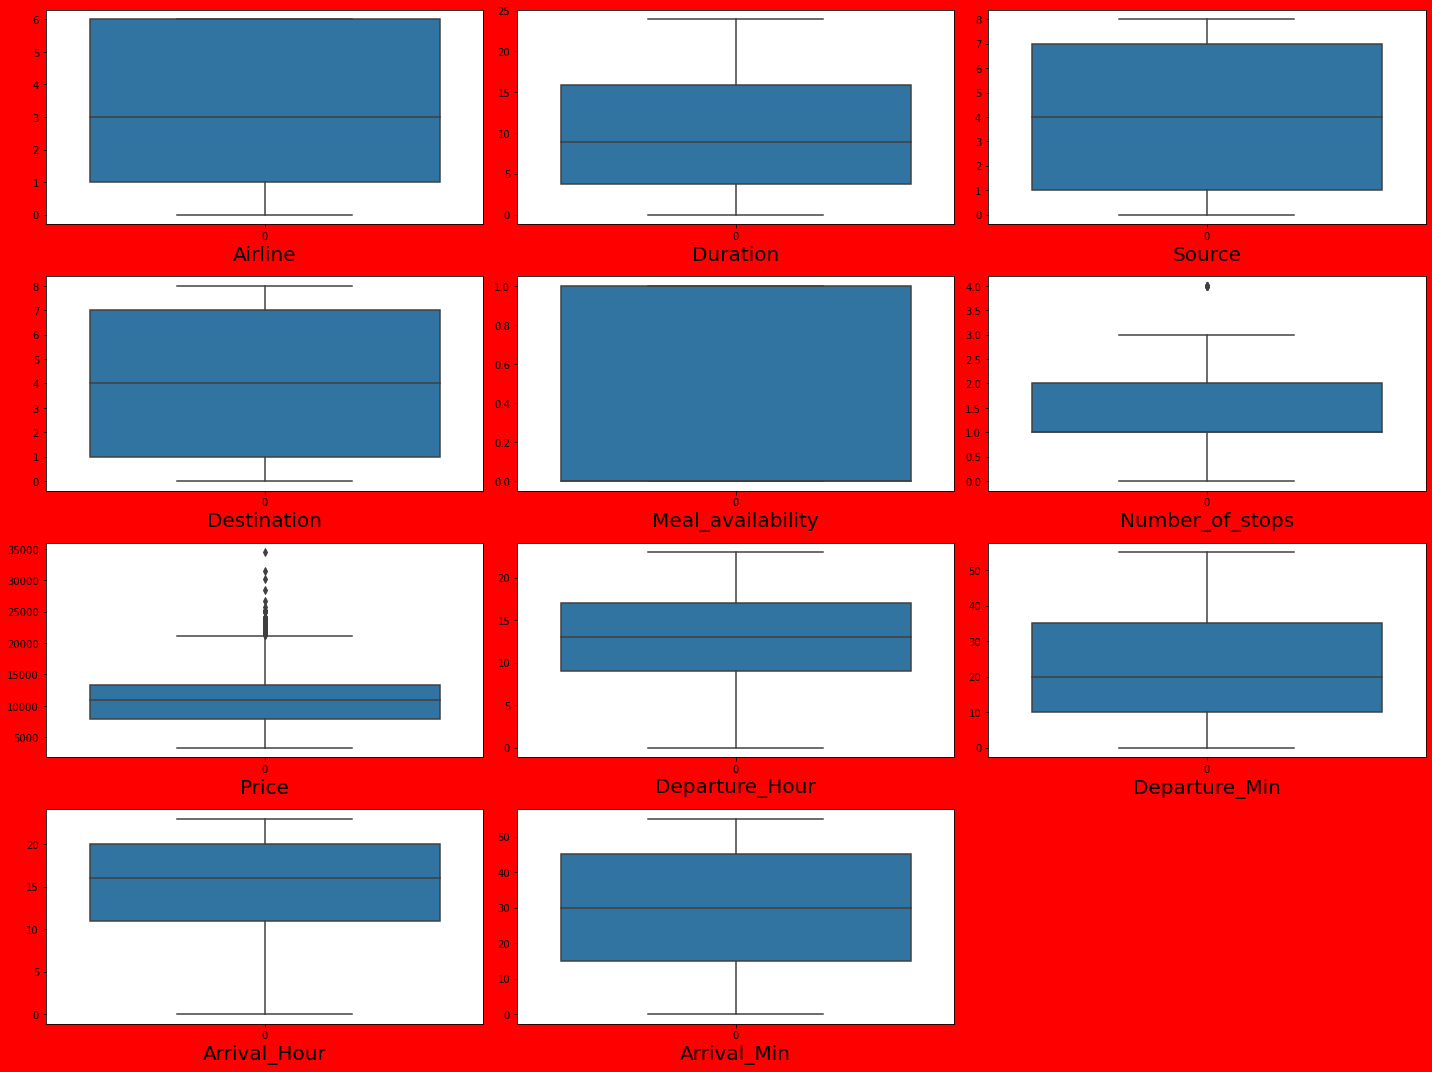

In [200]:
#Now lets find the outliers by ploting box plots

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df:
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

Obsrvations from the box plots

The outliers present in Number_of_stops and "Price" columns.

Since Price is our target column and Number_of_stops is our categorical variable so no need to remove outliers in this columns. Finally there is no need to remove outliers in the dataset.



In [201]:
# Checking the skewness
df.skew()

Airline              0.496364
Duration             0.399778
Source               0.016951
Destination         -0.019977
Meal_availability    0.850587
Number_of_stops      0.312150
Price                0.712937
Departure_Hour       0.035188
Departure_Min        0.271873
Arrival_Hour        -0.566616
Arrival_Min         -0.144255
dtype: float64

We can find the skewness Price column. Price is our target variable we should not loose any data so, no need remove skewness in this column.

In [202]:
# Checking the correlation between features and the target
df.corr()


,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.022649,-0.013769,-0.033054,-0.021856,-0.061305,0.163581,-0.016129,0.268072,0.032486,0.246495
Duration,-0.022649,1.000000,-0.008533,-0.032784,-0.274652,0.291171,0.234105,0.145564,-0.057662,-0.174592,0.018757
Source,-0.013769,-0.008533,1.000000,-0.225079,0.031009,-0.062430,-0.071986,0.150178,-0.083125,0.001105,0.025851
Destination,-0.033054,-0.032784,-0.225079,1.000000,0.011119,-0.046276,-0.093157,-0.053477,0.012982,0.067865,-0.080293
Meal_availability,-0.021856,-0.274652,0.031009,0.011119,1.000000,-0.469110,-0.515277,-0.092760,0.156749,0.042677,-0.046260
Number_of_stops,-0.061305,0.291171,-0.062430,-0.046276,-0.469110,1.000000,0.591860,-0.024533,-0.100924,0.046833,0.010652
Price,0.163581,0.234105,-0.071986,-0.093157,-0.515277,0.591860,1.000000,-0.009928,-0.064796,0.018966,0.052880
Departure_Hour,-0.016129,0.145564,0.150178,-0.053477,-0.092760,-0.024533,-0.009928,1.000000,-0.062936,0.002850,0.002150
Departure_Min,0.268072,-0.057662,-0.083125,0.012982,0.156749,-0.100924,-0.064796,-0.062936,1.000000,0.039838,0.086734
Arrival_Hour,0.032486,-0.174592,0.001105,0.067865,0.042677,0.046833,0.018966,0.002850,0.039838,1.000000,0.000928


In [203]:
#sorting the correlation values in assending order for the label(price)
df.corr()['Price'].sort_values()

Meal_availability   -0.515277
Destination         -0.093157
Source              -0.071986
Departure_Min       -0.064796
Departure_Hour      -0.009928
Arrival_Hour         0.018966
Arrival_Min          0.052880
Airline              0.163581
Duration             0.234105
Number_of_stops      0.591860
Price                1.000000
Name: Price, dtype: float64

To get a more clear view lets plot the heat map. we can get all the correlation there

<AxesSubplot:>

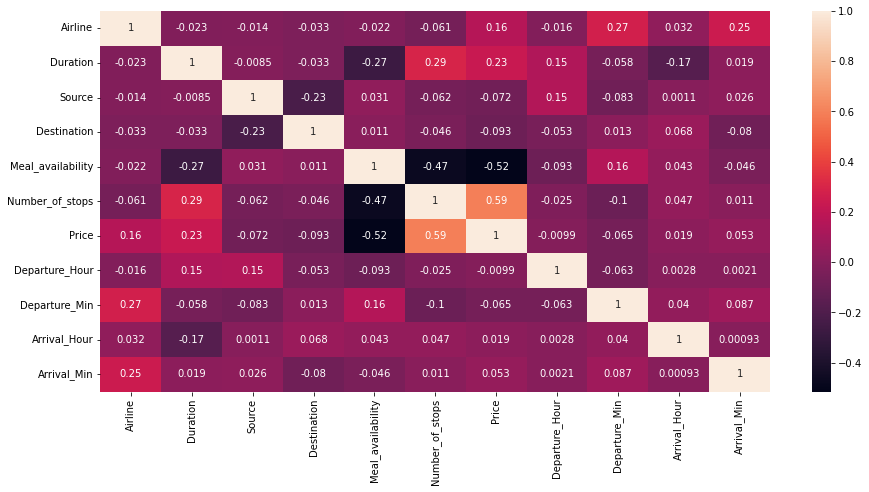

In [204]:
#now lets find out the co relation using heatmap plot.
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

Observation fromt the heatmap

This heat map contains both positive and negative correlation.

The features Number_of_stops, Duration Arrival_Hour and Airline are highly positively correlated with the target column compared to other features.

The other features have very less correlation with the target column.

From the map we can also observe there is no multicollinearity issue exists.

 now lest Visualize the correlation between label and features using bar plot

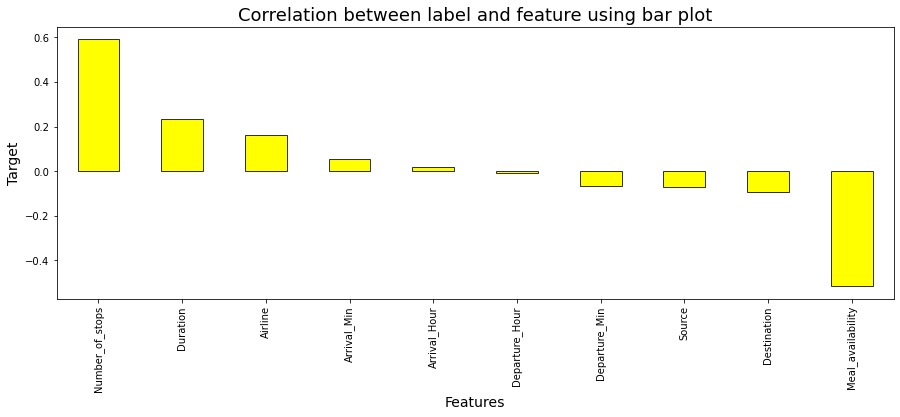

In [205]:
plt.figure(figsize=(15,5))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='yellow',edgecolor=".2")
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

From the bar plot we can clearly observe the positive and negative correlation between the label and features. Here the column "Departure_Min" has less correlation with the label compared to other features, we can drop this column if necessary but for now let's keep it as it is.

In [206]:
# lets divide the dataset into features and labels

y=df['Price']
x=df.drop(columns=['Price'])

In [207]:
x

,Airline,Duration,Source,Destination,Meal_availability,Number_of_stops,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,2,2.166667,8,7,1,0,8,45,10,55
1,2,2.250000,8,7,1,0,14,20,16,35
2,2,2.250000,8,7,1,0,21,0,23,15
3,2,5.583333,8,7,1,1,16,20,21,55
4,2,5.916667,8,7,1,1,13,45,19,40
...,...,...,...,...,...,...,...,...,...,...
3622,1,22.916667,6,4,0,1,20,15,19,10
3623,3,9.833333,6,4,1,1,13,0,22,50
3624,1,2.166667,6,4,0,1,11,5,13,15
3625,1,17.000000,6,4,0,2,20,15,13,15


In [208]:
y

0        5954.0
1        5954.0
2        5954.0
3        5954.0
4        5954.0
         ...   
3622     7359.0
3623     8912.0
3624    12189.0
3625    13977.0
3626    14604.0
Name: Price, Length: 3627, dtype: float64

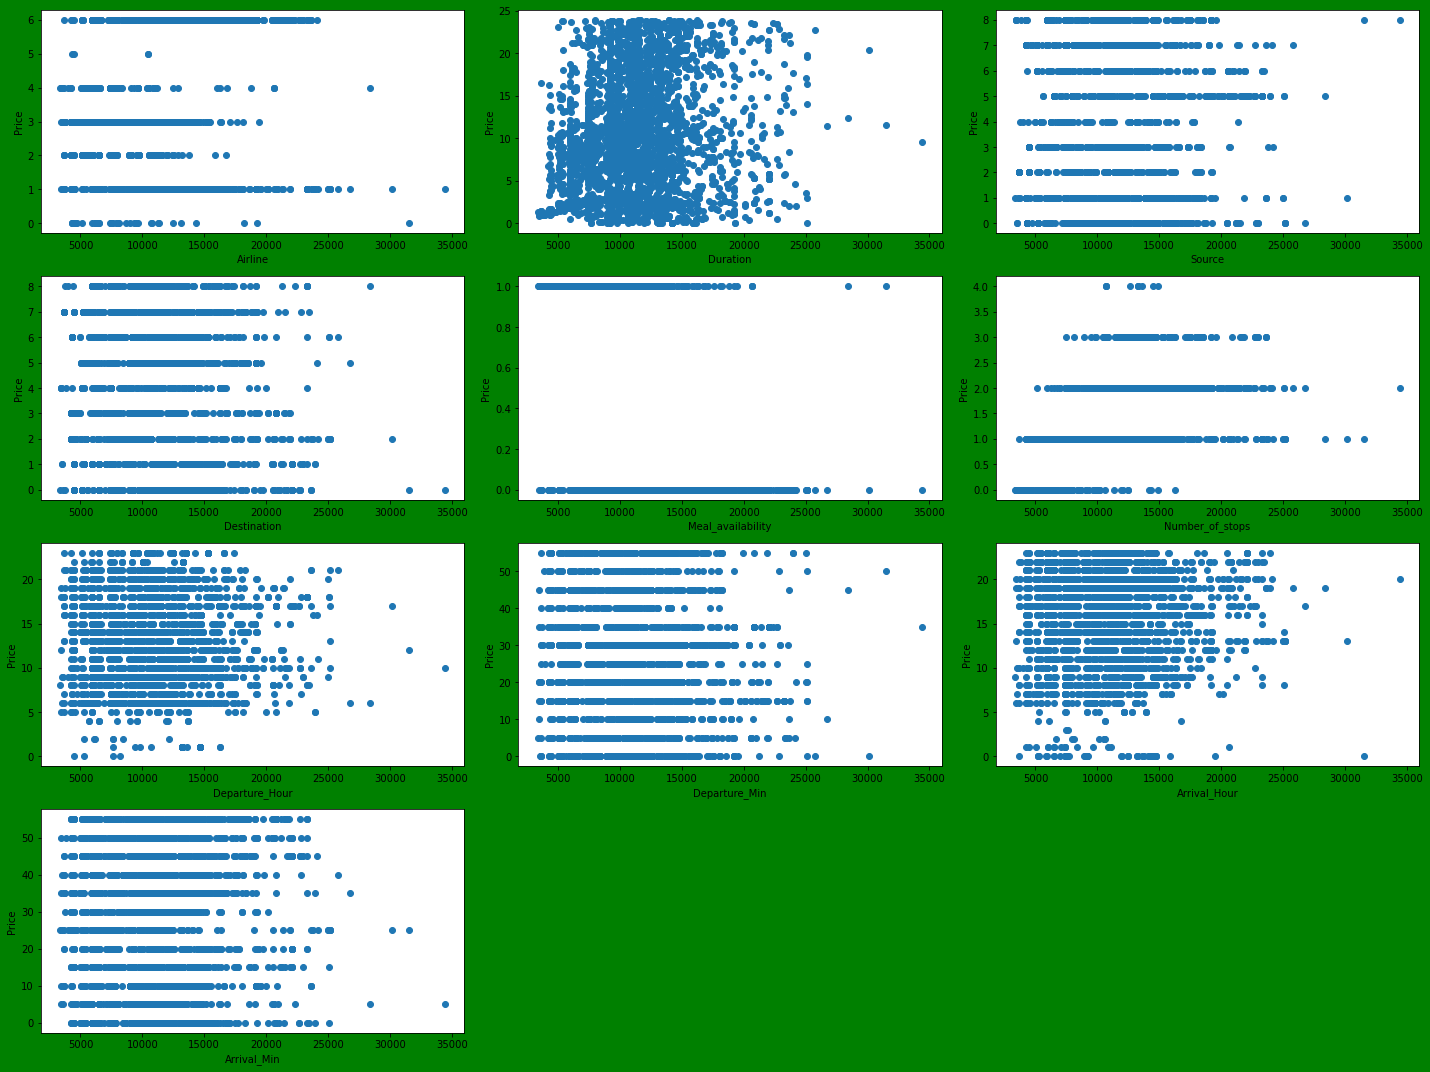

In [209]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        plt.scatter(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Price',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

the trend is not clear here so lets plot a regplot to have a better understanding

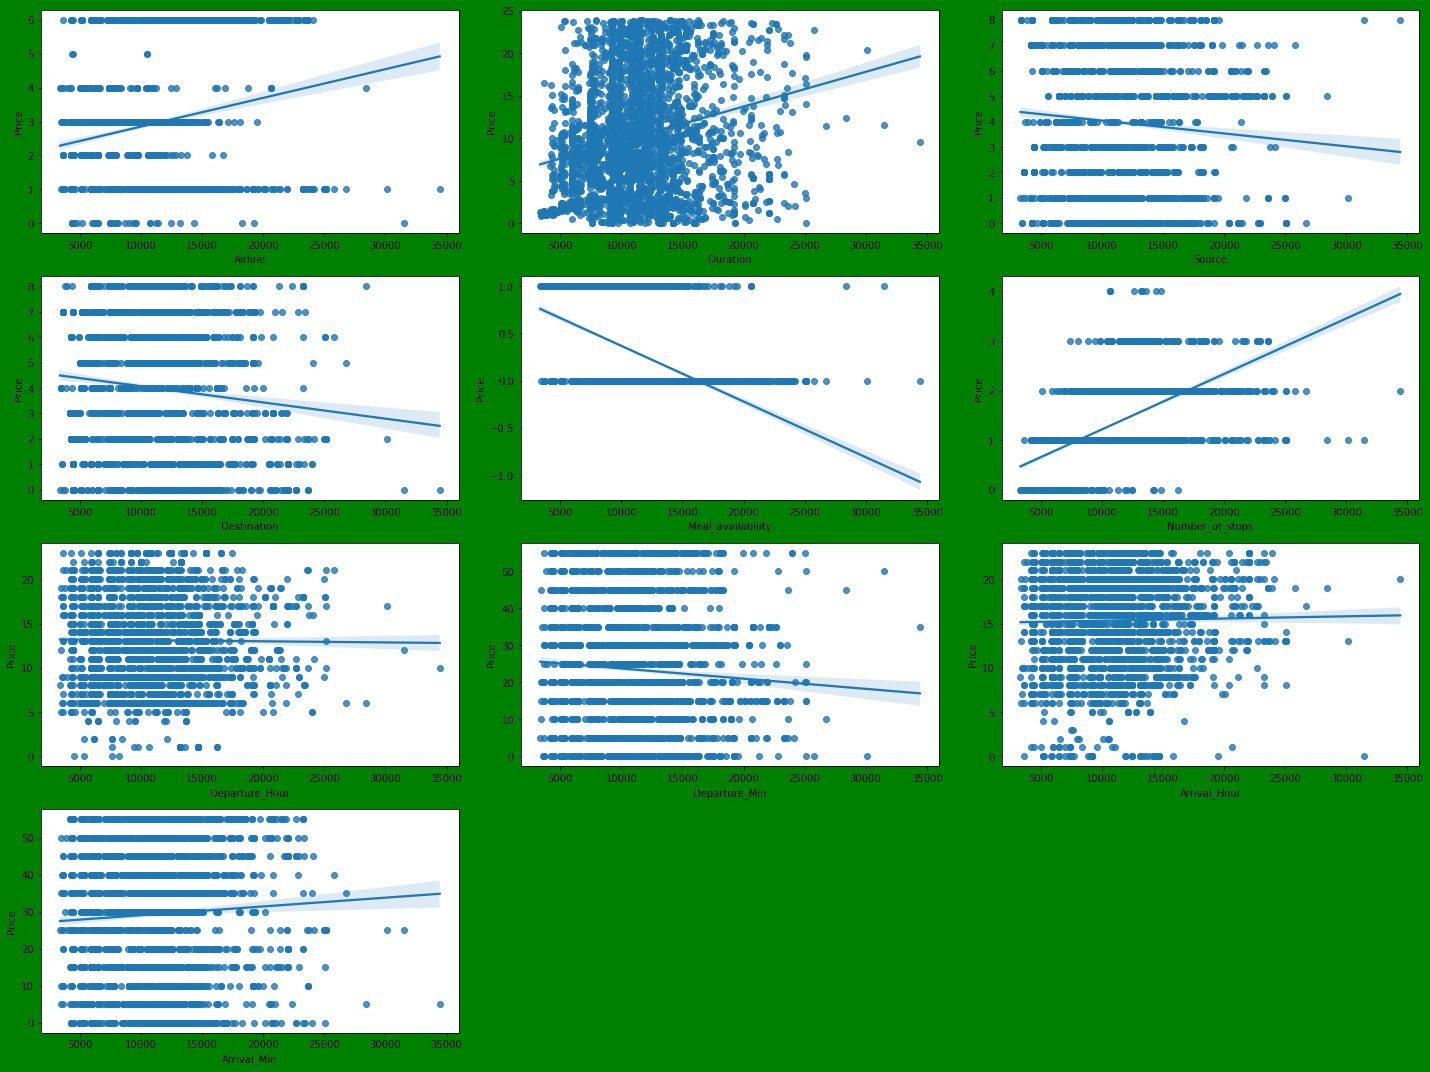

In [210]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.regplot(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Price',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

observation from the regplot

airlines have positive relation with ticket prices.

we can say as the stops shows anegative relationship with ticket price decreases.

Flight source has positive relationship with the price.

flights having Free meal facility have high ticket prices.

there is no significant difference between price and departure min.

we can conlude arival hour has some positive correlation with price.

We can say flight ticket prices are not much dependent on the Arrival_min.

we can observe some positive linear relation between Duration and Price. 

# EDA Conclusion



After cleaning the data, we have done the following analysis on the data.

-Do airfares change frequently? Do they move in small increments or in large jumps?

Flight ticket prices change during the morning and evening time of the day. From the distribution plots we came to know that the prices of the flight tickets are going up and down, they are not fixed at a time. Also, from this graph we found prices are increasing in large amounts.

-Do they tend to go up or down over time?

Some flights are departing in the early morning 3 AM having most expensive ticket prices compared to late morning flights. As the time goes the flight ticket fares increased and midnight flight fares are very less (say after 10 PM). Also from categorical and numerical plots we found that the prices are tending to go up as the time is approaching from morning to evening.

-What is the best time to buy so that the consumer can save the most by taking the least risk?

From the categorical plots (bar and box) we came to know that early morning and late night flights are cheaper compared to working hours.

-Does price increase as we get near to departure date?

From the categorical plots we found that the flight ticket prices increases as the person get near to departure time. That is last minute flights are very expensive.

-Is Indigo cheaper than Jet Airways?

From the bar plot we got to know that both Indigo and Spicejet airways almost having same ticket fares.

-Are morning flights expensive?

Not all flights are expensive during morning, only few flights departing in the early morning 3 AM are expensive. Apart from this the flight ticket fares are less compared to other timing flight fares.

In [211]:
#using standard scalar for scaling the model
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)

In [212]:
x_scaled

array([[-0.45351646, -1.13036938,  1.42231909, ...,  1.26283836,
        -1.01175527,  1.42336793],
       [-0.45351646, -1.11847752,  1.42231909, ..., -0.20042748,
         0.12365202,  0.31469071],
       [-0.45351646, -1.11847752,  1.42231909, ..., -1.37104015,
         1.44829386, -0.79398651],
       ...,
       [-0.93406107, -1.13036938,  0.71423436, ..., -1.07838698,
        -0.44405163, -0.79398651],
       [-0.93406107,  0.9863818 ,  0.71423436, ..., -0.49308065,
        -0.44405163, -0.79398651],
       [-0.93406107,  1.4382725 ,  0.71423436, ..., -1.07838698,
        -0.44405163, -0.79398651]])

Finding the variance inflation factor (VIF) for each scaled column to know about the multi-colinerity


In [213]:
#computing vif for all the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['Features']=x.columns

vif

,VIF,Features
0,1.151164,Airline
1,1.190307,Duration
2,1.089753,Source
3,1.071232,Destination
4,1.366147,Meal_availability
5,1.382306,Number_of_stops
6,1.064154,Departure_Hour
7,1.121484,Departure_Min
8,1.054475,Arrival_Hour
9,1.074069,Arrival_Min


The vif scores for all the features is below 10. So no features show strong multicolinearity.

Now as the label or the target variable is a continuous data so this is a regression problem. We will be building some regression algorithms for this problem and we will find out the best machine learning model among them.

# Building Machine Learning Models and choosing the best one among them

In [214]:
#splitting the data between train and test. the model will be built(trained) on the train data and tested on test data

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=488)
y_train.head()


396      5955.0
2285    12033.0
2221    12499.0
2872    12054.0
1692     9141.0
Name: Price, dtype: float64

In [215]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [216]:
regression=LinearRegression()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
svr=SVR()
dtc=DecisionTreeRegressor()
BR=BaggingRegressor()


LinearRegression()
adjusted R2 score for training data------ 0.4652970579570842
adjusted R2 score for testing data------ 0.4634316364015756
mean absolute error------ 2178.5920229148605
mean squared error------ 9134561.742033688
root mean squared error------ 3022.343749812997


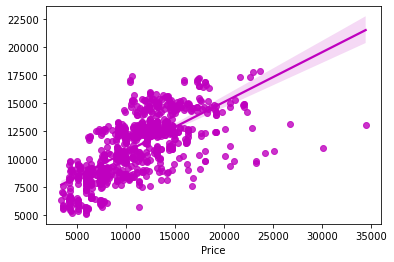

KNeighborsRegressor()
adjusted R2 score for training data------ 0.7045886545797582
adjusted R2 score for testing data------ 0.5021785482603923
mean absolute error------ 1960.0590959206174
mean squared error------ 8474932.731642779
root mean squared error------ 2911.1737721480627


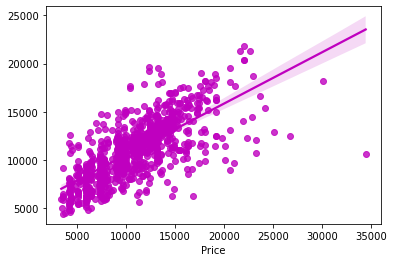

SVR()
adjusted R2 score for training data------ 0.027650540091973208
adjusted R2 score for testing data------ 0.027242696932282096
mean absolute error------ 3188.1800116842146
mean squared error------ 16560260.066947298
root mean squared error------ 4069.4299437325735


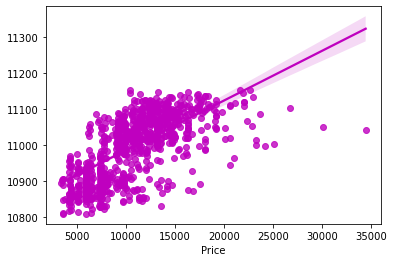

RandomForestRegressor()
adjusted R2 score for training data------ 0.9604741505119984
adjusted R2 score for testing data------ 0.7116346249206799
mean absolute error------ 1335.5702362953107
mean squared error------ 4909143.925783416
root mean squared error------ 2215.658801752521


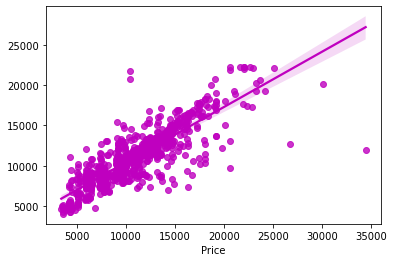

DecisionTreeRegressor()
adjusted R2 score for training data------ 0.9982255033707857
adjusted R2 score for testing data------ 0.4281651933242069
mean absolute error------ 1615.7371922087468
mean squared error------ 9734939.109703539
root mean squared error------ 3120.086394589666


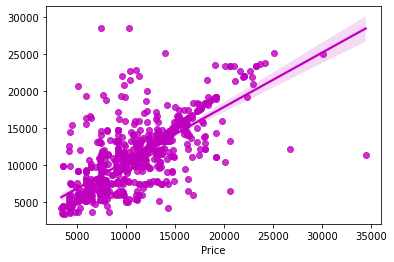

BaggingRegressor()
adjusted R2 score for training data------ 0.942808019577655
adjusted R2 score for testing data------ 0.6848018679039403
mean absolute error------ 1385.877077277739
mean squared error------ 5365945.877420349
root mean squared error------ 2316.451138578224


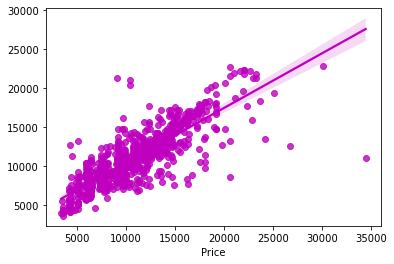

In [217]:
models = [regression, knn, svr, rf,dtc,BR]
for m in models:
    print (m)
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    print ('adjusted R2 score for training data------',m.score(x_train, y_train))
    print ('adjusted R2 score for testing data------',m.score(x_test, y_test))
    print ("mean absolute error------",mean_absolute_error(y_test,y_pred))
    print ("mean squared error------",mean_squared_error(y_test,y_pred))
    print ("root mean squared error------",np.sqrt(mean_squared_error(y_test,y_pred)))
    sns.regplot(y_test,y_pred,color="m")
    plt.show()


In [218]:
# Cross validation scores for all models
from sklearn.model_selection import cross_val_score
for m in models:
    c_v= cross_val_score(m, x, y, cv = 10)
    print ('Cross Validation Score for ',m, ' is :', c_v.mean())
    print (' ')

Cross Validation Score for  LinearRegression()  is : 0.40953958363652304
 
Cross Validation Score for  KNeighborsRegressor()  is : -0.12498143165341899
 
Cross Validation Score for  SVR()  is : -0.05970187532778348
 
Cross Validation Score for  RandomForestRegressor()  is : 0.45619197633273406
 
Cross Validation Score for  DecisionTreeRegressor()  is : -0.06448642476716263
 
Cross Validation Score for  BaggingRegressor()  is : 0.4103893103086138
 


After analysing all the models we have concluded that RandomForestRegressor() model gives the best R2 score and cross validation score. And based on the R2 score we have chosen RandomForestRegressor() as the best model. We will use RandomForestRegressor() model for further analysis.

# Hyperparameter Tuning of RandomForestRegressor() model using GridSearchCV

In [219]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid={'min_samples_split': [2, 5, 10],'max_features':['auto', 'sqrt'],'min_samples_leaf':[1,2,4],'n_estimators': [2,5,8,10,17]}

In [220]:
gridsearch=GridSearchCV(estimator=rf , param_grid=param_grid )

In [221]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [2, 5, 8, 10, 17]})

In [222]:
gridsearch.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 17}

In [223]:
rf=RandomForestRegressor(max_features='auto', min_samples_leaf=2,min_samples_split=5,n_estimators=17)

In [224]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_features='auto', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=17)

In [225]:
y_pred=rf.predict(x_test)


In [226]:
y_pred

array([13957.94705882,  7802.06323529, 14485.3767507 , 17353.13235294,
       11703.48529412, 15476.49635854,  9422.37058824,  9737.99397759,
       11599.11323529, 10667.56862745, 11695.69243697, 10415.93333333,
       11947.75273109,  9035.57094474,  7182.72661064, 12918.17170868,
       11990.95056022,  9820.58823529, 13569.4697479 , 17404.02254902,
       11778.14509804, 12478.9719888 , 12727.7894958 ,  8796.1745098 ,
       15546.04278075,  4394.35980392,  5798.51029412,  9919.88039216,
       10837.77759104, 12573.68991597,  9437.14509804, 13692.67375859,
        8165.86386555,  3968.49327731,  8359.83015873, 19556.80980392,
        8177.59591291, 14070.60392157,  7212.40116713, 12049.36442577,
        8966.29131653,  9084.34159664, 12108.03284314, 15267.03760504,
       14539.93160598,  8579.53851541, 11697.19957983, 11506.41006069,
        8871.37745098, 12934.06323529, 10020.98482726, 14130.53235294,
        8527.2004902 , 10983.96176471, 10002.33984594, 10441.83188609,
      

In [227]:
print ('adjusted R2 score for training data------',rf.score(x_train, y_train))
print ('adjusted R2 score for testing data------',rf.score(x_test, y_test))
print ("mean absolute error------",mean_absolute_error(y_test,y_pred))
print ("mean squared error------",mean_squared_error(y_test,y_pred))
print ("root mean squared error------",np.sqrt(mean_squared_error(y_test,y_pred)))

adjusted R2 score for training data------ 0.9108800861515229
adjusted R2 score for testing data------ 0.6933698030880564
mean absolute error------ 1409.8658388373917
mean squared error------ 5220084.998824781
root mean squared error------ 2284.750533170915


In [228]:
Predicted_ticket_Price = pd.DataFrame([rf.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
Predicted_ticket_Price

,0,1,2,3,4,5,6,7,8,9,...,897,898,899,900,901,902,903,904,905,906
Predicted,13957.947059,7802.063235,14485.376751,17353.132353,11703.485294,15476.496359,9422.370588,9737.993978,11599.113235,10667.568627,...,11411.768627,14225.163445,5511.35713,11346.24902,11977.137815,12120.80042,11151.942647,11871.393067,8321.862885,15012.580812
Original,13695.000000,7425.000000,15939.000000,19089.000000,11659.000000,15312.000000,11349.000000,7213.000000,16027.000000,13524.000000,...,13524.000000,14388.000000,5178.00000,11409.00000,14662.000000,8437.00000,10843.000000,12318.000000,5955.000000,17257.000000


In [229]:
#saving the machine learning model
import pickle
filename='finalized_model.pickle17'
pickle.dump(rf,open('finalized_model.pickle17','wb'))

# Conclusion



Key Findings and Conclusion of the Study:

The case study aims to give an idea of applying Machine Learning algorithms to predict the price of the flight tickets. After the completion of this project, we got an insight of how to collect data, pre-processing the data, analyze the data, cleaning the data and building a model.

First we collected the flights data from website www.yatra.com and it was done by using Web scraping. The framework used for web scraping was Selenium, which has an advantage of automating our process of collecting data. We collected almost 5303 of data which contained the ticket price of the flights and other related features. Then, the scrapped data was saved in a excel file so that we can use further and analyse the data.

Then we loaded the dataset and have done data cleaning, EDA process and pre-processing techniques like checking outliers, skewness, correlation, scaling data etc and got better insights from data visualization.
From the visualizations we have done some analysis which I have mentioned already in the EDA conclusion part. That is:
Data Analysis

-Do airfares change frequently? Do they move in small increments or in large jumps?

Flight ticket prices change during the morning and evening time of the day. From the distribution plots we came to know that the prices of the flight tickets are going up and down, they are not fixed at a time. Also, from this graph we found prices are increasing in large amounts.

-Do they tend to go up or down over time?

Some flights are departing in the early morning 3 AM having most expensive ticket prices compared to late morning flights. As the time goes the flight ticket fares increased and midnight flight fares are very less (say after 10 PM). Also from categorical and numerical plots we found that the prices are tending to go up as the time is approaching from morning to evening.

-What is the best time to buy so that the consumer can save the most by taking the least risk?

From the categorical plots (bar and box) we came to know that early morning and late night flights are cheaper compared to working hours.

-Does price increase as we get near to departure date?

From the categorical plots we found that the flight ticket prices increases as the person get near to departure time. That is last minute flights are very expensive.

-Is Indigo cheaper than Jet Airways?

From the bar plot we got to know that both Indigo and Spicejet airways almost having same ticket fares.

-Are morning flights expensive?

Not all flights are expensive during morning, only few flights departing in the early morning 3 AM are expensive. Apart from this the flight ticket fares are less compared to other timing flight fares.

After separating our train and test data, we started running different machine learning regression algorithms to find out the best performing model on the basis of different metrics like R2 Score, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error. We tried many algorithms like Decision Tree Regressor, Random Forest Regressor,Bagging Regressor, linear regression,KneighbourRegressor and SVR.

We got RandomForestRegressor() as the best model among all the models as it was giving high R2 score and the low evaluation metrics compared to other models. On this basis we performed the Hyperparameter tuning to finding out the best parameter and improving the scores. The R2 score increased after tuning. So we concluded that RandomForestRegressor as the best algorithm as it was giving high R2 score after tuning.

After that we saved the model in a pickle with a file name in order to use whenever we require. Then we loaded the saved file and predicted the values.

Overall, we can conclude that RandomForestRegressor is the best working algorithm model we obtained. We can improve the data and R2 score by adding some more features to the dataset.